# Cluster

## Usage

See [link](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods)

## KMeans

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from 
, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated. Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

Cluster labels: [2 0 2 2 0 0 2 1 2 2 0 2 2 2 0 2 2 2 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 2 0 1 2 2 2 1 1 0 0 2 2 0 2 2 0 0 0 0 0 0 2 1 0 0 1 0 2 0 0 2 0 2
 2 2 2 2 0 1 0 2 0 1 0 1 1 0 2 0 2 0 0 2 0 1 2 0 1 1]
Cluster centroids: [[0.76167338 0.40765364]
 [0.27223715 0.21097997]
 [0.35217863 0.78488734]]


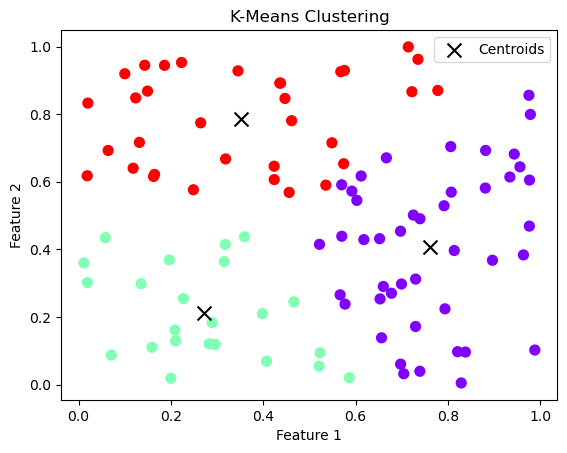

In [7]:
# Illustration of kmeans
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, n_clusters, max_iters=100):
    n_samples, n_features = X.shape
    
    # init center randomly
    random_indices = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iters):
        # assign sample to the nearest center
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # update center
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # if the center doesn't change, quit iteration
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

np.random.seed(0)
X = np.random.rand(100, 2)

n_clusters = 3
labels, centroids = kmeans(X, n_clusters)

print("Cluster labels:", labels)
print("Cluster centroids:", centroids)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [8]:
import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

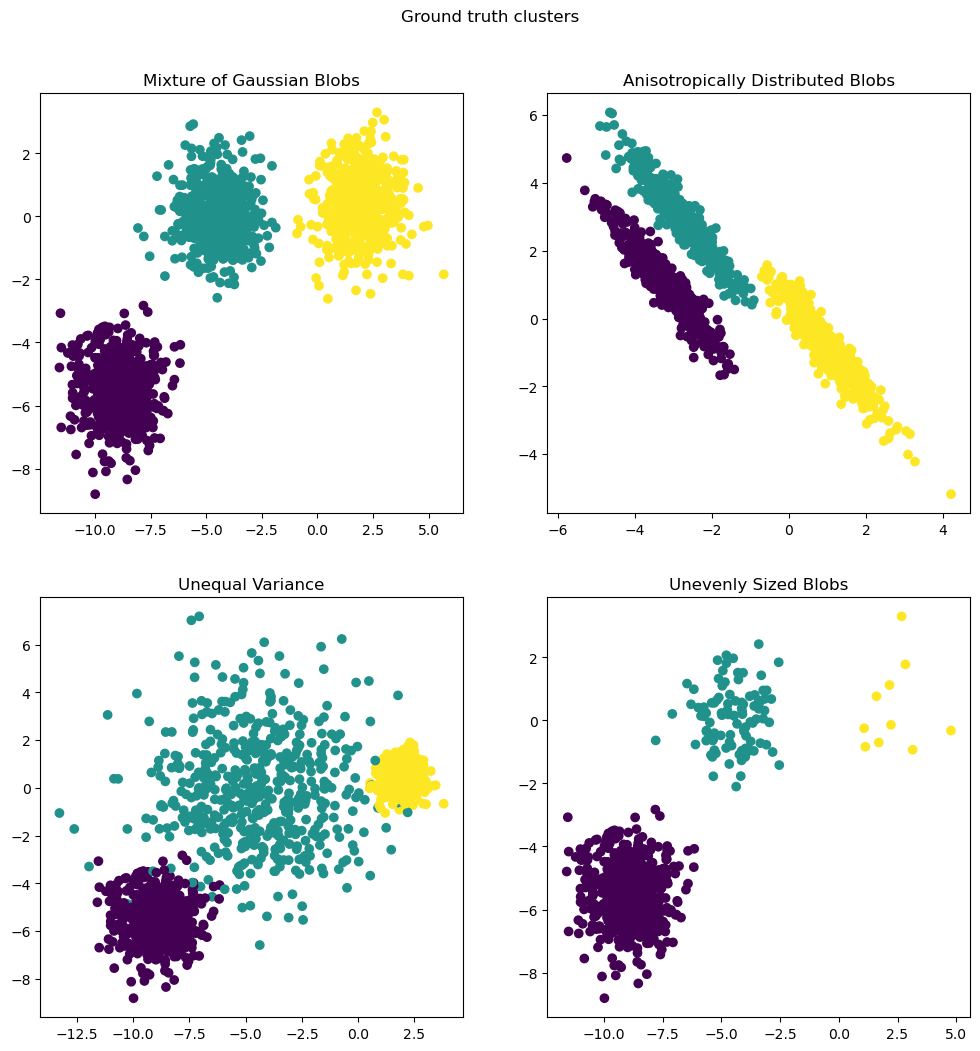

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

### Bad kmeans cluster

Due to wrong number of clusters, anisotropically distribute blobs, unequal variance and unequal blob size, we may get some bad results.

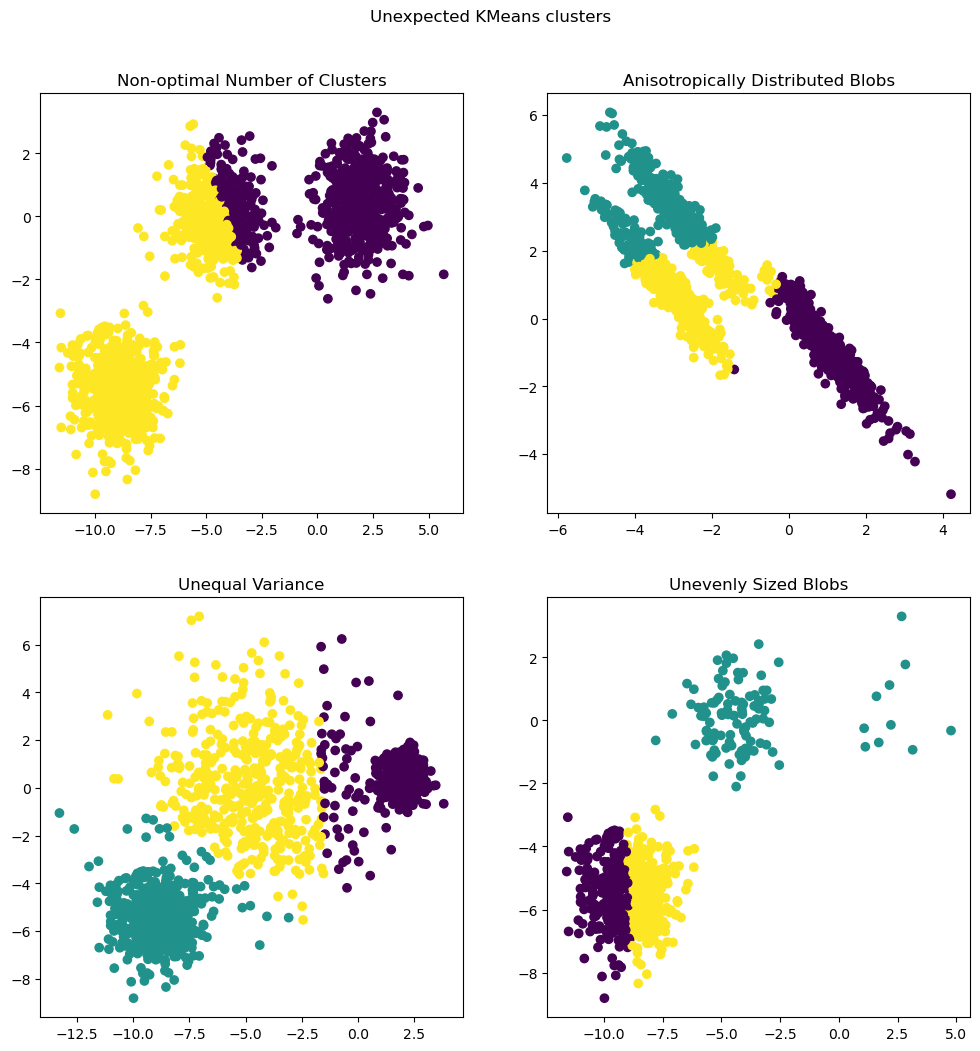

In [10]:
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

By setting the correct number of cluster, we get a better cluster.

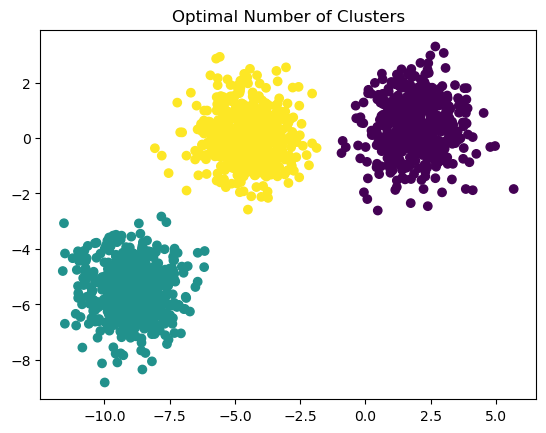

In [11]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

To deal with unevenly sized blobs one can increase the number of random initializations. In this case we set n_init=10 to avoid finding a sub-optimal local minimum.

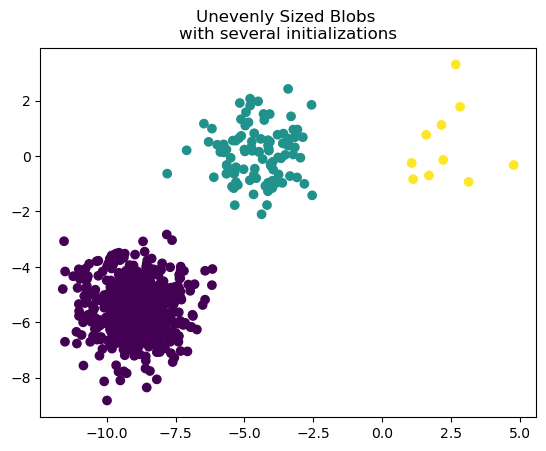

In [12]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations")
plt.show()

As anisotropic and unequal variances are real limitations of the k-means algorithm, here we propose instead the use of GaussianMixture, which also assumes gaussian clusters but does not impose any constraints on their variances. Notice that one still has to find the correct number of blobs.

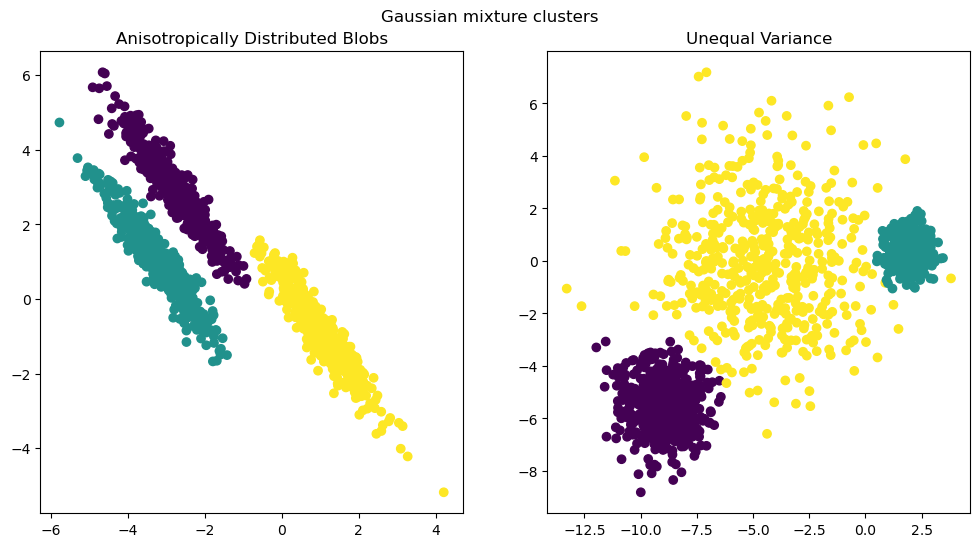

In [13]:
from sklearn.mixture import GaussianMixture

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Anisotropically Distributed Blobs")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Unequal Variance")

plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.show()

## Affinity Propagation

AffinityPropagation通过在样本对之间发送消息直到收敛来创建簇。然后使用少量样本来描述数据集，这些样本被识别为最能代表其他样本的样本。对之间发送的消息表示一个样本是否适合作为另一个样本的样本，该消息会根据其他对的值进行更新。这种更新迭代地进行，直到收敛，此时选择最终的样本，从而给出最终的聚类。

亲和力传播可能很有趣，因为它根据提供的数据选择簇的数量。为此，两个重要参数是首选项（控制使用多少个样本）和阻尼因子（阻尼因子），阻尼因子抑制责任和可用性消息以避免更新这些消息时出现数值振荡。

亲和传播的主要缺点是其复杂性。该算法的时间复杂度为$O(N^2T)$， 在哪里$N$是样本数，$T$是收敛之前的迭代次数。此外，内存复杂度为$O(N^2)$如果使用密集相似度矩阵，但如果使用稀疏相似度矩阵则可简化。这使得亲和传播最适合中小型数据集。

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

In [3]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


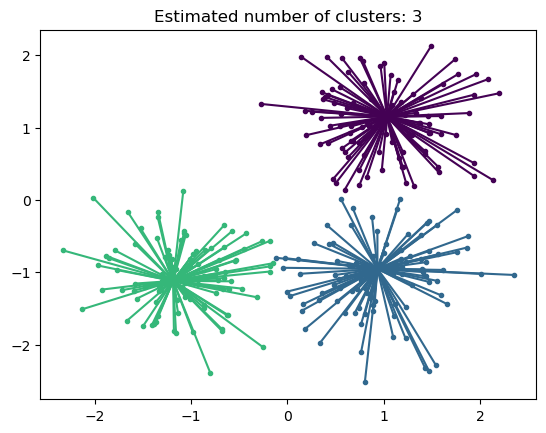

In [4]:
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [5]:
import sys

import numpy as np
import pandas as pd

symbol_dict = {
    "TOT": "Total",
    "XOM": "Exxon",
    "CVX": "Chevron",
    "COP": "ConocoPhillips",
    "VLO": "Valero Energy",
    "MSFT": "Microsoft",
    "IBM": "IBM",
    "TWX": "Time Warner",
    "CMCSA": "Comcast",
    "CVC": "Cablevision",
    "YHOO": "Yahoo",
    "DELL": "Dell",
    "HPQ": "HP",
    "AMZN": "Amazon",
    "TM": "Toyota",
    "CAJ": "Canon",
    "SNE": "Sony",
    "F": "Ford",
    "HMC": "Honda",
    "NAV": "Navistar",
    "NOC": "Northrop Grumman",
    "BA": "Boeing",
    "KO": "Coca Cola",
    "MMM": "3M",
    "MCD": "McDonald's",
    "PEP": "Pepsi",
    "K": "Kellogg",
    "UN": "Unilever",
    "MAR": "Marriott",
    "PG": "Procter Gamble",
    "CL": "Colgate-Palmolive",
    "GE": "General Electrics",
    "WFC": "Wells Fargo",
    "JPM": "JPMorgan Chase",
    "AIG": "AIG",
    "AXP": "American express",
    "BAC": "Bank of America",
    "GS": "Goldman Sachs",
    "AAPL": "Apple",
    "SAP": "SAP",
    "CSCO": "Cisco",
    "TXN": "Texas Instruments",
    "XRX": "Xerox",
    "WMT": "Wal-Mart",
    "HD": "Home Depot",
    "GSK": "GlaxoSmithKline",
    "PFE": "Pfizer",
    "SNY": "Sanofi-Aventis",
    "NVS": "Novartis",
    "KMB": "Kimberly-Clark",
    "R": "Ryder",
    "GD": "General Dynamics",
    "RTN": "Raytheon",
    "CVS": "CVS",
    "CAT": "Caterpillar",
    "DD": "DuPont de Nemours",
}


symbols, names = np.array(sorted(symbol_dict.items())).T

quotes = []

for symbol in symbols:
    print("Fetching quote history for %r" % symbol, file=sys.stderr)
    url = (
        "https://raw.githubusercontent.com/scikit-learn/examples-data/"
        "master/financial-data/{}.csv"
    )
    quotes.append(pd.read_csv(url.format(symbol)))

close_prices = np.vstack([q["close"] for q in quotes])
open_prices = np.vstack([q["open"] for q in quotes])

# The daily variations of the quotes are what carry the most information
variation = close_prices - open_prices

Fetching quote history for 'AAPL'


KeyboardInterrupt: 

In [ ]:
from sklearn import covariance

alphas = np.logspace(-1.5, 1, num=10)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)

# standardize the time series: using correlations rather than covariance
# former is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

In [ ]:
from sklearn import cluster

_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()

for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(names[labels == i])}")

In [ ]:
# Finding a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

from sklearn import manifold

node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver="dense", n_neighbors=6
)

embedding = node_position_model.fit_transform(X.T).T

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.figure(1, facecolor="w", figsize=(10, 8))
plt.clf()
ax = plt.axes([0.0, 0.0, 1.0, 1.0])
plt.axis("off")

# Plot the graph of partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = np.abs(np.triu(partial_correlations, k=1)) > 0.02

# Plot the nodes using the coordinates of our embedding
plt.scatter(
    embedding[0], embedding[1], s=100 * d**2, c=labels, cmap=plt.cm.nipy_spectral
)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [embedding[:, start], embedding[:, stop]] for start, stop in zip(start_idx, end_idx)
]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.hot_r, norm=plt.Normalize(0, 0.7 * values.max())
)
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = "left"
        x = x + 0.002
    else:
        horizontalalignment = "right"
        x = x - 0.002
    if this_dy > 0:
        verticalalignment = "bottom"
        y = y + 0.002
    else:
        verticalalignment = "top"
        y = y - 0.002
    plt.text(
        x,
        y,
        name,
        size=10,
        horizontalalignment=horizontalalignment,
        verticalalignment=verticalalignment,
        bbox=dict(
            facecolor="w",
            edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
            alpha=0.6,
        ),
    )

plt.xlim(
    embedding[0].min() - 0.15 * embedding[0].ptp(),
    embedding[0].max() + 0.10 * embedding[0].ptp(),
)
plt.ylim(
    embedding[1].min() - 0.03 * embedding[1].ptp(),
    embedding[1].max() + 0.03 * embedding[1].ptp(),
)

plt.show()

## MeanShift

MeanShift聚类的目的是在平滑密度的样本中发现斑点。它是一种基于质心的算法，其工作原理是将质心候选更新为给定区域内点的平均值。然后在后处理阶段对这些候选点进行过滤，以消除近似重复项，从而形成最终的质心集。

均值平移算法可以用于对数据进行聚类，特别适用于不规则形状的簇。它能够自动识别数据中的局部密度最大区域，并将数据点聚集在这些区域中。

均值平移算法可以用于异常检测，因为异常点通常会在低密度区域，而正常点则在高密度区域。

均值平移算法可以用于估计数据点的密度分布。通过找到数据点密度最大的区域，可以获取数据的密度分布信息。

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [ ]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## SpectralClustering

SpectralClustering执行样本之间的亲和力矩阵的低维嵌入，然后例如通过KMeans对低维空间中的特征向量的分量进行聚类。如果亲和矩阵是稀疏的并且amg求解器用于特征值问题，则计算效率特别高（注意，amg求解器要求安装pyamg模块。）

当前版本的 SpectralClustering 需要提前指定簇的数量。它适用于少量集群，但不建议用于许多集群。

对于两个簇，SpectralClustering 解决了相似图上归一化切割问题的凸松弛 ：将图切割为两部分，以便与每个簇内的边的权重相比，边切割的权重较小。当处理图像时，这个标准特别有趣，其中图的顶点是像素，并且相似度图的边缘的权重是使用图像的梯度函数来计算的。

In [ ]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [ ]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [ ]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [ ]:
graph.data = np.exp(-graph.data / graph.data.std())

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

In [ ]:
# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>
#         Brian Cheung
#         Andrew Knyazev <Andrew.Knyazev@ucdenver.edu>
# License: BSD 3 clause

import time

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.data import coins
from skimage.transform import rescale

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image

# load the coins as a numpy array
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect", anti_aliasing=False)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(rescaled_coins)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# The number of segmented regions to display needs to be chosen manually.
# The current version of 'spectral_clustering' does not support determining
# the number of good quality clusters automatically.
n_regions = 26

## Hierarchical clustering

层次聚类是一类通用的聚类算法，它通过连续合并或拆分嵌套聚类来构建嵌套聚类。这种簇的层次结构表示为树（或树状图）。树的根是收集所有样本的唯一簇，叶子是仅包含一个样本的簇。请参阅维基百科页面了解更多详细信息。

该AgglomerativeClustering对象使用自下而上的方法执行分层聚类：每个观察都从其自己的聚类开始，并且聚类依次合并在一起。链接标准决定了用于合并策略的指标：

Ward最小化所有簇内的平方差之和。它是一种方差最小化方法，在这个意义上类似于 k 均值目标函数，但采用凝聚分层方法来处理。

- 最大或完全链接最小化了簇对观测值之间的最大距离。

- 平均链接最小化簇对的所有观测值之间的平均距离。

- 单链接最小化了簇对的最近观测值之间的距离。

凝聚集群具有“富者愈富”的行为，导致集群规模不均匀。就此而言，单一联动是最差的策略，Ward 给出了最常规的尺寸。然而，亲和力（或聚类中使用的距离）不能随 Ward 变化，因此对于非欧几里得度量，平均链接是一个很好的选择。单一链接虽然对噪声数据不稳健，但可以非常有效地计算，因此可用于提供较大数据集的层次聚类。单一链接也可以在非球形数据上表现良好。

Computing embedding
Done.
ward :	0.17s
average :	0.07s
complete :	0.08s
single :	0.03s


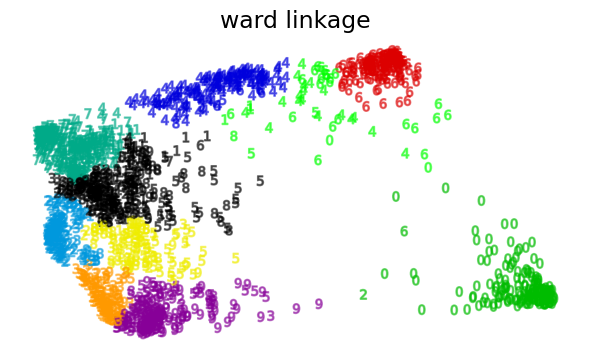

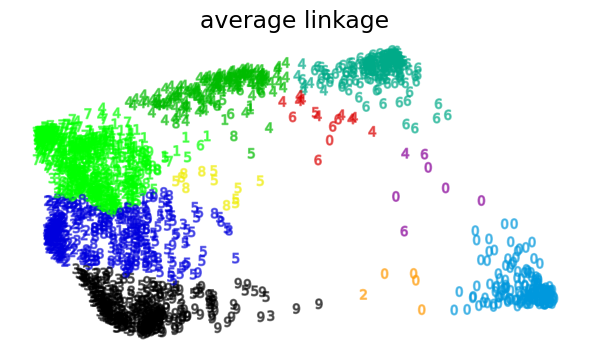

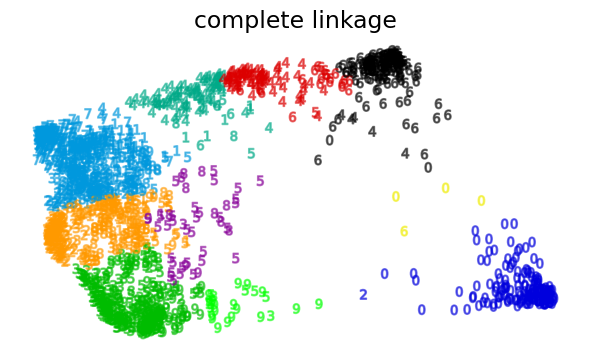

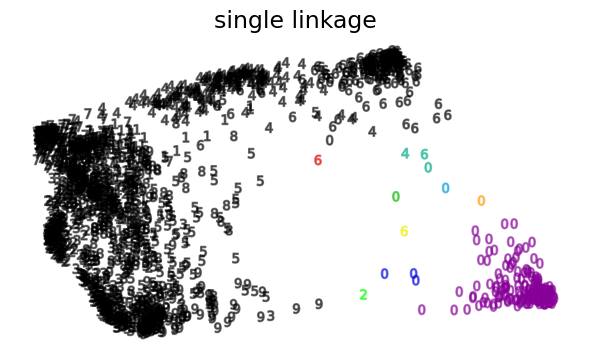

In [1]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, manifold

digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

np.random.seed(0)


# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

一个有趣的方面AgglomerativeClustering是，可以通过连接矩阵将连接约束添加到该算法中（只有相邻的簇可以合并在一起），该连接矩阵为每个样本定义遵循给定数据结构的相邻样本。例如，在下面的瑞士卷示例中，连接性约束禁止合并瑞士卷上不相邻的点，从而避免形成延伸穿过卷的重叠折叠的簇。

### 选择度量

单一、平均和完整的链接可以与各种距离（或亲和力）一起使用，特别是欧几里得距离（l2）、曼哈顿距离（或 Cityblock 或l1）、余弦距离或任何预先计算的亲和力矩阵。

- l1距离通常适用于稀疏特征或稀疏噪声：即许多特征为零，就像在使用稀有词的文本挖掘中一样。
- 余弦距离很有趣，因为它对于信号的全局缩放是不变的。

选择度量的准则是使用最大化不同类中样本之间距离并最小化每个类内样本距离的度量。

In [ ]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))


X = list()
y = list()
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30):
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < 0.997] = 0

        X.append(
            12
            * (
                (a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise)))
                + additional_noise
            )
        )
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ("Waveform 1", "Waveform 2", "Waveform 3")

colors = ["#f7bd01", "#377eb8", "#f781bf"]

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, color, n in zip(range(n_clusters), colors, labels):
    lines = plt.plot(X[y == l].T, c=color, alpha=0.5)
    lines[0].set_label(n)

plt.legend(loc="best")

plt.axis("tight")
plt.axis("off")
plt.suptitle("Ground truth", size=20, y=1)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y == i], X[y == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            t = plt.text(
                i,
                j,
                "%5.3f" % avg_dist[i, j],
                verticalalignment="center",
                horizontalalignment="center",
            )
            t.set_path_effects(
                [PathEffects.withStroke(linewidth=5, foreground="w", alpha=0.5)]
            )

    plt.imshow(avg_dist, interpolation="nearest", cmap="cividis", vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18, y=1)
    plt.tight_layout()


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", metric=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, color in zip(np.arange(model.n_clusters), colors):
        plt.plot(X[model.labels_ == l].T, c=color, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(metric=%s)" % metric, size=20, y=1)


plt.show()

## Bisecting KMeans

See the user guide.

## DBSCAN

DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的聚类算法，用于发现数据集中的密集区域，并将数据点分成若干个簇（clusters）。与传统的聚类算法（如K均值）不同，DBSCAN能够自动识别出噪声点，而不需要预先指定簇的数量。

DBSCAN的主要思想是根据数据点之间的密度关系，将数据划分为三种类型：

- 核心点（Core Point）：在半径为 ε（epsilon）内至少包含 MinPts 个数据点的数据点被称为核心点。这意味着核心点附近有足够数量的点，可以形成一个簇。
- 边界点（Border Point）：不是核心点，但在某个核心点的半径 ε 内的点被称为边界点。这些点可能属于某个簇，但不具备足够的密度形成簇的核心。
- 噪声点（Noise Point）：既不是核心点，也不在任何核心点的半径 ε 内的点被称为噪声点。这些点不属于任何簇。

DBSCAN的工作过程：

- 选择一个未被访问的数据点。
- 如果该点是核心点，构建一个新簇，并将其所有密度可达的点都加入到这个簇中。
- 如果该点是边界点，将其加入到与之相关的核心点所属的簇中。
- 重复以上步骤，直到所有点都被访问过。

DBSCAN的优势包括：

- 不需要预先指定簇的数量，可以自动识别出簇的个数。
- 能够识别出噪声点，对数据的异常值不敏感。
- 可以发现不规则形状的簇，对簇的大小和形状没有限制。

然而，DBSCAN的参数选择（ε 和 MinPts）对结果影响较大，需要根据数据特点进行调整。同时，DBSCAN对于高维数据和不同密度的簇效果可能会有限。

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## HDBSCAN

该HDBSCAN算法可以看作是DBSCAN 和的扩展OPTICS。具体来说，DBSCAN假设聚类标准（即密度要求）是全局同质的。换句话说，DBSCAN可能很难成功捕获具有不同密度的簇。 HDBSCAN通过构建聚类问题的替代表示来减轻这种假设并探索所有可能的密度尺度。

### 层次聚类

提取 MST $G_{ms}$

通过为每个顶点添加“自边”来扩展 MST，权重等于底层样本的核心距离。

为 MST 初始化单个簇和标签。

从 MST 中移除重量最大的边缘（同时移除连接）。

将簇标签分配给包含现已删除的边的端点的连接组件。如果该组件没有至少一个边缘，则会为其分配一个“空”标签，将其标记为噪声。

重复4-5，直到不再有连接的组件。

因此，HDBSCAN 能够获取 DBSCAN* 可实现的所有可能的分区，以min_samples分层方式进行固定选择。事实上，这使得 HDBSCAN 能够跨多个密度执行聚类，因此它不再需要$\epsilon$作为超参数给出。相反，它仅依赖于 的选择min_samples，这往往是一个更稳健的超参数。

HDBSCAN 可以使用附加的超参数进行平滑，min_cluster_size 该超参数指定在分层聚类期间，样本数量少于minimum_cluster_size多个的组件被视为噪声。在实践中，可以设置耦合参数并简化超参数空间。minimum_cluster_size = min_samples

## Optical cluster

OPTICS（Ordering Points To Identify the Clustering Structure）是一种基于密度的聚类算法，类似于DBSCAN。它的主要目标是识别数据集中的密集区域，同时能够保持数据点的密度分布顺序，不仅仅关注于距离。

与DBSCAN不同，OPTICS不需要预先设定参数如 ε（epsilon）和 MinPts。相反，OPTICS通过计算每个数据点到其周围点的距离，构建一个可达距离图，然后根据这个图来判断数据点之间的聚类关系。

OPTICS的主要思想：

1. 从一个未访问的数据点开始，计算其与其他所有数据点的距离，并将这些距离按照从小到大的顺序排列。
2. 根据距离计算结果，将数据点构建成一个可达距离图（Reachability Plot）。这个图显示了每个点的可达距离，即从该点到核心点的最短距离。
3. 根据可达距离图中的局部最小值，将数据点划分为核心点、边界点和噪声点。
4. 可以通过划分可达距离图的拐点来确定数据点的聚类结构。

OPTICS的优势包括：
- 不需要事先设定参数，可以自动识别出簇的个数和密度。
- 能够捕捉数据点的密度分布顺序，对不同密度和大小的簇有较好的适应性。
- 不容易受到参数的影响，相对稳定。

然而，OPTICS也有一些缺点，例如对于高维数据和噪声点的处理可能不如预期。与DBSCAN一样，对于不同数据集需要进行合适的参数调整以获得较好的聚类效果。

## Birch Cluster

BIRCH（Balanced Iterative Reducing and Clustering using Hierarchies）是一种用于大规模数据集的层次聚类算法。BIRCH通过构建一个多叉树来对数据进行聚类，以减少计算量和内存消耗，适用于需要高效处理大量数据的情况。

BIRCH的主要思想如下：

1. 构建一个多叉树，每个节点表示一个数据点或一个聚类。树的叶子节点存储数据点，内部节点表示聚类。
2. 在构建过程中，不断更新每个节点的统计信息，例如每个节点的数据点数、数据点的均值和方差等。
3. 通过在树中逐渐合并相似的节点，形成层次聚类结构。

BIRCH算法有两个参数，阈值和分支因子。分支因子限制节点中子簇的数量，阈值限制输入样本与现有子簇之间的距离。

为了避免全局聚类的计算，partial_fit 建议用户每次调用

- n_clusters=None初始设置
- 通过多次调用partial_fit 来训练所有数据。
- 使用设置n_clusters为所需的值 brc.set_params(n_clusters=n_clusters)。
- partial_fit不带参数调用finally，即brc.partial_fit() 执行全局聚类。

BIRCH的优势包括：
- 对于大规模数据集的处理效率高，可以在内存有限的情况下处理大量数据。
- 不需要预先指定簇的数量，能够自动识别出簇的个数。
- 适用于高维数据和数据分布不均匀的情况。

然而，BIRCH也有一些限制，例如：
- 对于不同密度的簇，效果可能不如DBSCAN等基于密度的聚类算法。
- 在处理高维数据时，可能会受到维度灾难的影响，导致聚类效果不佳。

总体而言，BIRCH适用于需要高效处理大规模数据的情况，但在选择聚类算法时，需要考虑数据的特点以及所需的聚类结果。